In [ ]:
import numpy as np
from keras import layers, models
from keras.datasets import reuters
from keras import  regularizers

In [ ]:
dim=10000
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=dim)

/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
train_data.shape

(8982,)

In [ ]:
word_index = reuters.get_word_index()

In [ ]:
word_index = dict([(value,key) for (key,value) in word_index.items()])

**Vectorizar data**

In [ ]:
def vectorizer(sequences,dim=10000):
  results = np.zeros((len(sequences),dim))
  for n, sequences in enumerate(sequences):
    results[n,sequences]=1
  return results

In [ ]:
x_train = vectorizer(train_data)
x_test = vectorizer(test_data)

**Vectorizacion de los labels**

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
# con esto podemos ver las posibles salidas del modelo en este caso 46
y_train.shape

(8982, 46)

**Creacion del modelo**

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l1(0.0001) ) )
model.add(layers.Dropout(.75))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001) ) )
model.add(layers.Dropout(.75))
model.add(layers.Dense(46, activation='softmax' ))# softmax es mejor para clasificacion multiple

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss="categorical_crossentropy", # para poder hacer clasificacion multiple
    metrics=["acc"]   
)

In [ ]:
# no esta funcionando pasandole una variable como numero verificar como hacerlo
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train =  y_train[1000:]


In [ ]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val,y_val))

16/16 [==============================] - 2s 35ms/step - loss: 4.0071 - acc: 0.0658 - val_loss: 3.5093 - val_acc: 0.5150
Epoch 2/9
16/16 [==============================] - 0s 14ms/step - loss: 3.5329 - acc: 0.1588 - val_loss: 3.0284 - val_acc: 0.5520
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 3.1931 - acc: 0.2473 - val_loss: 2.4988 - val_acc: 0.5670
Epoch 4/9
16/16 [==============================] - 0s 14ms/step - loss: 2.9080 - acc: 0.3158 - val_loss: 2.1992 - val_acc: 0.5680
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 2.6835 - acc: 0.3672 - val_loss: 1.9807 - val_acc: 0.5760
Epoch 6/9
16/16 [==============================] - 0s 14ms/step - loss: 2.5381 - acc: 0.3957 - val_loss: 1.8830 - val_acc: 0.5840
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 2.3583 - acc: 0.4302 - val_loss: 1.8155 - val_acc: 0.5900
Epoch 8/9
16/16 [==============================] - 0s 14ms/step - loss: 2.2928 - acc: 0.4429 - val_l

Loss respecto a las epocas

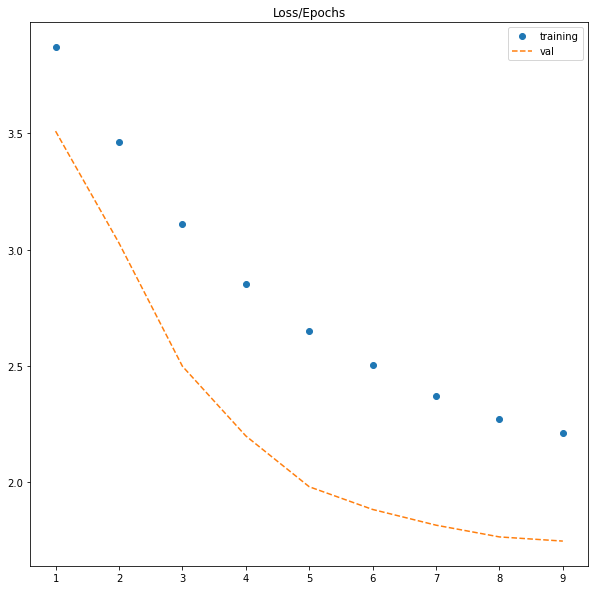

In [ ]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# ajustar la grafica a tamaño de los datos
fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.title("Loss/Epochs")
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()

Accuracy respecto a las epocas

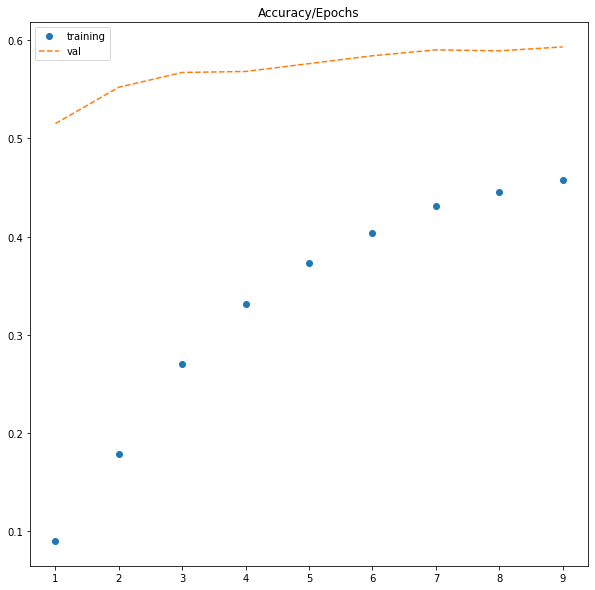

In [ ]:
import matplotlib.pyplot as plt 

history_dict = history.history
accuracy_values = history_dict['acc'] # debe ser la misma que la def en el compilador del modelo
val_accuracy_values = history_dict['val_acc']

# ajustar la grafica a tamaño de los datos
fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.title("Accuracy/Epochs")
plt.plot(epoch,accuracy_values, 'o',label='training')
plt.plot(epoch,val_accuracy_values, '--',label='val')
plt.legend()
plt.show()

Esto representa que hay overfitting en el modelo ya que se esta aprendiendo los datos

In [ ]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.4787 - acc: 0.7778


[1.478731632232666, 0.777827262878418]

In [ ]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9941 - acc: 0.7863


[0.9940683245658875, 0.7862867116928101]

In [ ]:
# generar predicciones del modelo con los datos de prueba
predictions=model.predict(x_test)

In [ ]:
predictions[0]

array([1.03088578e-05, 1.08613029e-04, 9.21167702e-06, 9.10493612e-01,
       8.53353366e-02, 1.48587060e-05, 5.18368615e-05, 1.90463595e-07,
       4.09269676e-04, 4.95160111e-06, 7.63374483e-05, 7.02098594e-04,
       9.24224223e-05, 7.83711148e-05, 8.27021813e-06, 9.31016475e-05,
       2.16768385e-04, 1.45738695e-05, 2.33697074e-06, 1.21696631e-03,
       2.33479659e-04, 8.18800836e-05, 7.37363689e-06, 2.63246657e-05,
       9.39766142e-06, 2.79376636e-05, 3.00761735e-06, 9.46290384e-05,
       1.40689808e-04, 8.39844070e-05, 1.45724525e-05, 1.74487450e-05,
       1.92246057e-06, 5.02414605e-06, 1.90069313e-05, 7.26899998e-07,
       1.59446470e-04, 2.57320062e-05, 3.00354714e-06, 5.04034069e-05,
       4.23885467e-05, 2.19590015e-06, 7.18762703e-06, 5.02476155e-07,
       2.60031385e-07, 1.93684946e-06], dtype=float32)

In [ ]:
# verificamos la posicion prediccion optenida por el modelo
np.argmax(predictions[0])

3